# Diabetes Prediction Using K-Nearest Neighbours Algorithm

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

### Loading the dataset

In [2]:
data = pd.read_csv('diabetes.csv')

### Descriptive Statistics

In [3]:
# Preview Data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Dataset dimensions - (rows, columns)
data.shape

(768, 9)

In [5]:
# Features data-type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
# Count of null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Observations:
1. There are a total of 768 records and 9 features in the dataset.
2. Each feature can be either of integer or float dataype.
3. Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.
4. There are zero NaN values in the dataset.
5. In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.

### Data Visualization

<AxesSubplot:xlabel='Outcome', ylabel='count'>

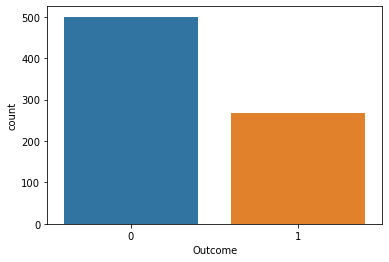

In [8]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = data)

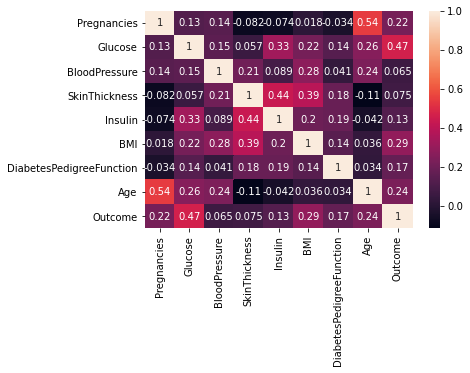

In [9]:
# Heatmap
sns.heatmap(data.corr(), annot = True)
plt.show()


### Observations:
1. The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who do.
2. From the correaltion heatmap, we can see that there is a high correlation between Outcome and [Glucose,BMI,Age,Insulin]. We can select these features to accept input from the user and predict the outcome.

### Data Cleaning

In [10]:
dataset_new = data

In [11]:
# Replacing zero values with NaN
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
dataset_new[zero_not_accepted] = dataset_new[zero_not_accepted].replace(0, np.NaN)

In [12]:
# Count of NaN
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
# Mean Values
print("Mean Value of Glucose is: ",round(dataset_new["Glucose"].mean(),2))
print("Mean Value of Blood Pressure is: ", round(dataset_new["BloodPressure"].mean(), 2))
print("Mean Value of Skin Thickness is: ", round(dataset_new["SkinThickness"].mean(),2))
print("Mean Value of Insulin is: ",round(dataset_new["Insulin"].mean(),2))
print("Mean Value of BMI is: ", round(dataset_new["BMI"].mean(),2))

Mean Value of Glucose is:  121.69
Mean Value of Blood Pressure is:  72.41
Mean Value of Skin Thickness is:  29.15
Mean Value of Insulin is:  155.55
Mean Value of BMI is:  32.46


In [14]:
# Replacing NaN with mean values
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

In [15]:
dataset_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


### Data Preprocessing

In [16]:
# Extracting independent variables
X = data.iloc[:,0:8]
# Extracting dependent variable
y = data.iloc[:,8]   # Outcome is the only dependent variable

### Splitting dataset into training and testing set

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

 ### Feature Scaling

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Computing Optimal K Value

In [19]:
# empty list that will hold accuracy scores
ac_scores = []
neighbors = list(range(1,40))
# Calculating error for K values between 1 and 40
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    # Predict the response
    y_pred = knn.predict(X_test)
    # Evaluate Accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)
    
# Changing to misclassifiction error
MSE = [1 - x for x in ac_scores]

# Determining best K
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal value of K is: ",optimal_k)

The optimal value of K is:  32


Text(0, 0.5, 'Mean Error')

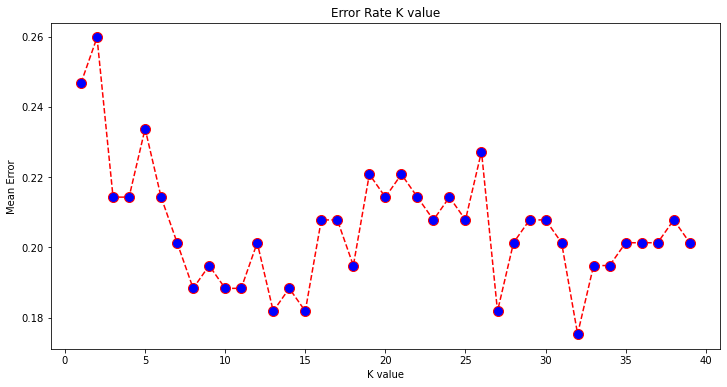

In [20]:
plt.figure(figsize= (12,6))
plt.plot(range(1,40), MSE, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

### Training and Predictions

In [21]:
# K nearest neighbours algorithm
# n-neighbors = optimal_k
classifier = KNeighborsClassifier(n_neighbors=32, p =2 ,metric='euclidean')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

### Evaluating model

In [22]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[98  9]
 [18 29]]
0.6823529411764706
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



### Accuracy

In [23]:
print(round(accuracy_score(y_test,y_pred)*100,3))

82.468


In [24]:
y_pred1 = classifier.predict([[1,126.0,60.0,29.153,155.54,30.1,0.349,47]])

In [25]:
y_pred1

array([1], dtype=int64)